In [1]:
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/
/*                                                                      */
/*To use this script, first you have to sourse the LocalConfig.sh file. */
/* i.e. source HEPTools/LocalConfigDelphes.sh                           */
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/

In [2]:
#include "TMath.h"

In [3]:
//gSystem->Load("/home/camilo/HEPTools/MADGRAPH/MG5_aMC_v2_5_5_Root6/ExRootAnalysis/libExRootAnalysis.so");
gSystem->Load("/home/camilo/HEPTools/MADGRAPH/MG5_aMC_v2_5_5_Root6/Delphes/libDelphes.so");
//If you run sourse DelphesEnv.sh
//gSystem->Load("libDelphes.so");

In [4]:
TChain chain("Delphes");

//chain.Add("/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/BackGround-lW/Events/run_01/*.root");
//chain.AddFile("/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/BackGround-mumuW/Events/run_01/tag_1_delphes_events.root");
chain.AddFile("/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/BackGround-mumuW_normal/Events/run_01/tag_1_delphes_events.root");
//chain.AddFile("/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/BackGround-mumuW/Events/run_03/tag_1_delphes_events.root");


In [5]:
//chain.Print()

In [6]:
TCut MuonCut1 = "" ;
TCut MuonCut2 = "" ;
TCut MuonCut3 = "" ;
TCut JetCut1  = "" ;
TCut MTCut    = "" ;
TCut AllCuts  = "" ;
TCut W        = "1";

In [7]:
nMC = chain.GetEntries();

In [8]:
nMC

(long long) 3873


In [9]:
Double_t WeightL = 3740.26291*1000*2.5/nMC;

In [10]:
//W        = "4031811.0";
W = std::to_string(WeightL).c_str();
MuonCut1 = "Muon_size==1";
MuonCut2 = "Muon.PT>25"  ;
MuonCut3 = "Muon.Eta<2.4&&Muon.Eta>-2.4"  ;
JetCut1  = "Jet.PT>30"   ;
MTCut    = "sqrt(2*Muon.PT*MissingET.MET*(1-cos((2*TMath::Pi()+Muon.Phi-MissingET.Phi)%(2*TMath::Pi()))))>50";
BCut     = "Jet.BTag==0";
AllCuts  = MuonCut1&&MuonCut2&&MuonCut3&&JetCut1&&MTCut&&BCut;

In [11]:
//chain.Draw("Jet_size",AllCuts*W);

In [12]:
W

(TCut &) Name: CUT Title: 2414.318945


In [13]:
chain.Draw("Jet_size>>myh",AllCuts*W,"goff");//send the histogram to the obget myh
auto h = (TH1F *)gROOT->FindObject("myh");

In [14]:
h->Draw()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


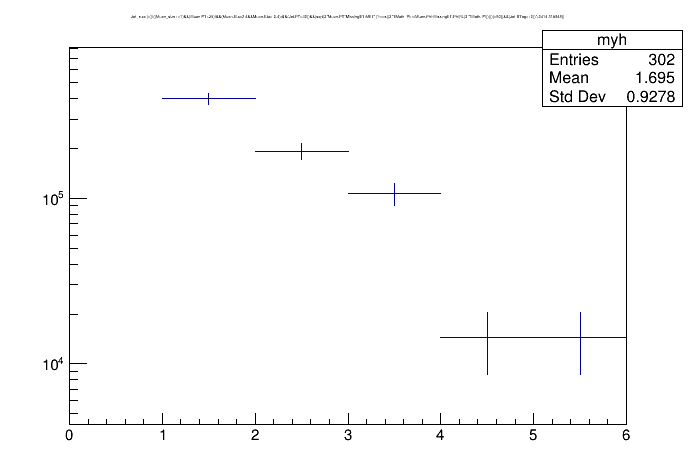

In [15]:
c1->SetLogy();
c1->Draw()

In [16]:
h->GetBinLowEdge(1)

(double) 0.0000000


In [17]:
h->GetBinContent(1)

(double) 0.0000000


In [18]:
h->GetBinLowEdge(2)

(double) 1.0000000


In [19]:
h->GetBinContent(2)

(double) 400776.28


In [20]:
h->GetBinContent(3)

(double) 193145.41


In [21]:
h->GetBinContent(4)

(double) 106230.07


In [22]:
h->GetBinContent(5)

(double) 14485.912
